In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.offline
from plotly.subplots import make_subplots

In [186]:
df=pd.read_excel("종목별장애인스포츠활성정보(202110).xlsx")

In [187]:
df=df[df["강좌종목수 "]!=0]
df.head()

,수요운동종목대분류명,수요운동종목소분류명,강좌종목수,대분류별 강좌종목비율,전체 강좌종목비율
2,구기및라켓류,골프,14,2.58e-02,5.43e-03
3,구기및라켓류,구기및라켓류_그외종목,23,4.24e-02,8.92e-03
4,구기및라켓류,농구,59,1.09e-01,2.29e-02
5,구기및라켓류,당구,32,5.89e-02,1.24e-02
6,구기및라켓류,럭비,2,3.68e-03,7.76e-04


### 새로운 열 추가하는 방법

In [182]:
df=df.append({'수요운동종목대분류명': '', '수요운동종목소분류명' : "무도/격투기","강좌종목수 ":886, "대분류별 강좌종목비율":100,"전체 강좌종목비율" :886/2578},ignore_index=True)
df=df.append({'수요운동종목대분류명': '', '수요운동종목소분류명' : "기타스포츠","강좌종목수 ":1, "대분류별 강좌종목비율":100,"전체 강좌종목비율" :1/2578},ignore_index=True)
df=df.append({'수요운동종목대분류명': '', '수요운동종목소분류명' : "레저스포츠","강좌종목수 ":5,"대분류별 강좌종목비율":100, "전체 강좌종목비율" :5/2578},ignore_index=True)
df=df.append( {'수요운동종목대분류명': '','수요운동종목소분류명' : "민속스포츠","강좌종목수 ":4,"대분류별 강좌종목비율":100, "전체 강좌종목비율" :4/2578},ignore_index=True)
df=df.append( {'수요운동종목대분류명': '','수요운동종목소분류명' : "구기및라켓류","강좌종목수 ":543,"대분류별 강좌종목비율":100, "전체 강좌종목비율" :543/2578},ignore_index=True)
df=df.append( {'수요운동종목대분류명': '','수요운동종목소분류명' : "체력단련및생활운동","강좌종목수 ":1139,"대분류별 강좌종목비율":100, "전체 강좌종목비율" :1139/2578},ignore_index=True)

In [188]:
df1=df[df['수요운동종목대분류명']=="무도/격투기"].reset_index(drop=True)
df1=df1.append({'수요운동종목대분류명': '', '수요운동종목소분류명' : "무도/격투기","강좌종목수 ":886, "대분류별 강좌종목비율":1,"전체 강좌종목비율" :886/2578},ignore_index=True)
df2=df[df['수요운동종목대분류명']=="기타스포츠"].reset_index(drop=True)
df2=df2.append({'수요운동종목대분류명': '', '수요운동종목소분류명' : "기타스포츠","강좌종목수 ":1, "대분류별 강좌종목비율":1,"전체 강좌종목비율" :1/2578},ignore_index=True)
df3=df[df['수요운동종목대분류명']=="레저스포츠"].reset_index(drop=True)
df3=df3.append({'수요운동종목대분류명': '', '수요운동종목소분류명' : "레저스포츠","강좌종목수 ":5,"대분류별 강좌종목비율":1, "전체 강좌종목비율" :5/2578},ignore_index=True)
df4=df[df['수요운동종목대분류명']=="민속스포츠"].reset_index(drop=True)
df4=df4.append( {'수요운동종목대분류명': '','수요운동종목소분류명' : "민속스포츠","강좌종목수 ":4,"대분류별 강좌종목비율":1, "전체 강좌종목비율" :4/2578},ignore_index=True)
df5=df[df['수요운동종목대분류명']=="구기및라켓류"].reset_index(drop=True)
df5=df5.append( {'수요운동종목대분류명': '','수요운동종목소분류명' : "구기및라켓류","강좌종목수 ":543,"대분류별 강좌종목비율":1, "전체 강좌종목비율" :543/2578},ignore_index=True)
df6=df[df['수요운동종목대분류명']=="체력단련및생활운동"].reset_index(drop=True)
df6=df6.append( {'수요운동종목대분류명': '','수요운동종목소분류명' : "체력단련및생활운동","강좌종목수 ":1139,"대분류별 강좌종목비율":1, "전체 강좌종목비율" :1139/2578},ignore_index=True)

In [189]:
df1

,수요운동종목대분류명,수요운동종목소분류명,강좌종목수,대분류별 강좌종목비율,전체 강좌종목비율
0,무도/격투기,무도/격투기_그외종목,251,0.28,0.10
1,무도/격투기,유도,39,0.04,0.02
2,무도/격투기,태권도,596,0.67,0.23
3,,무도/격투기,886,1.00,0.34


### plotly 타이틀 위치조정

### hovertext 백분율로 나타내기

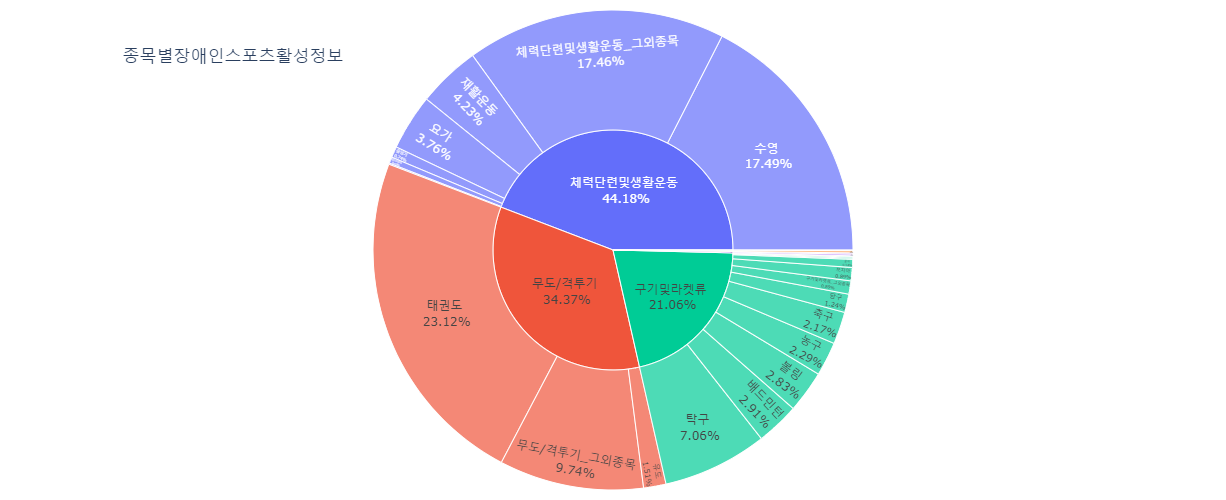

In [161]:
fig =go.Figure(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=data['수요운동종목소분류명'],
    parents=data['수요운동종목대분류명'],
    hovertext=data['전체 강좌종목비율']*100,
    values=data['강좌종목수 '], branchvalues="total", 
    text=data['전체 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%'
))
fig.update_layout(title_text='종목별장애인스포츠활성정보', title_x=0.1, title_y=0.9)
fig.update_layout(height=500, showlegend=True)
fig.update_traces(hovertemplate='%{label}<br> %{hovertext:.2f}%')
fig.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)


#fig.update_traces(texttemplate='%{percent:.1%f}')

In [129]:
plotly.offline.plot(fig,filename='종목별장애인스포츠활성정보(선버스트).html',config={'displayModeBar': True}) #html로 내보내기, bar 조정 불가하게 

'종목별장애인스포츠활성정보(선버스트).html'

### plotly 서브플롯으로 그리기

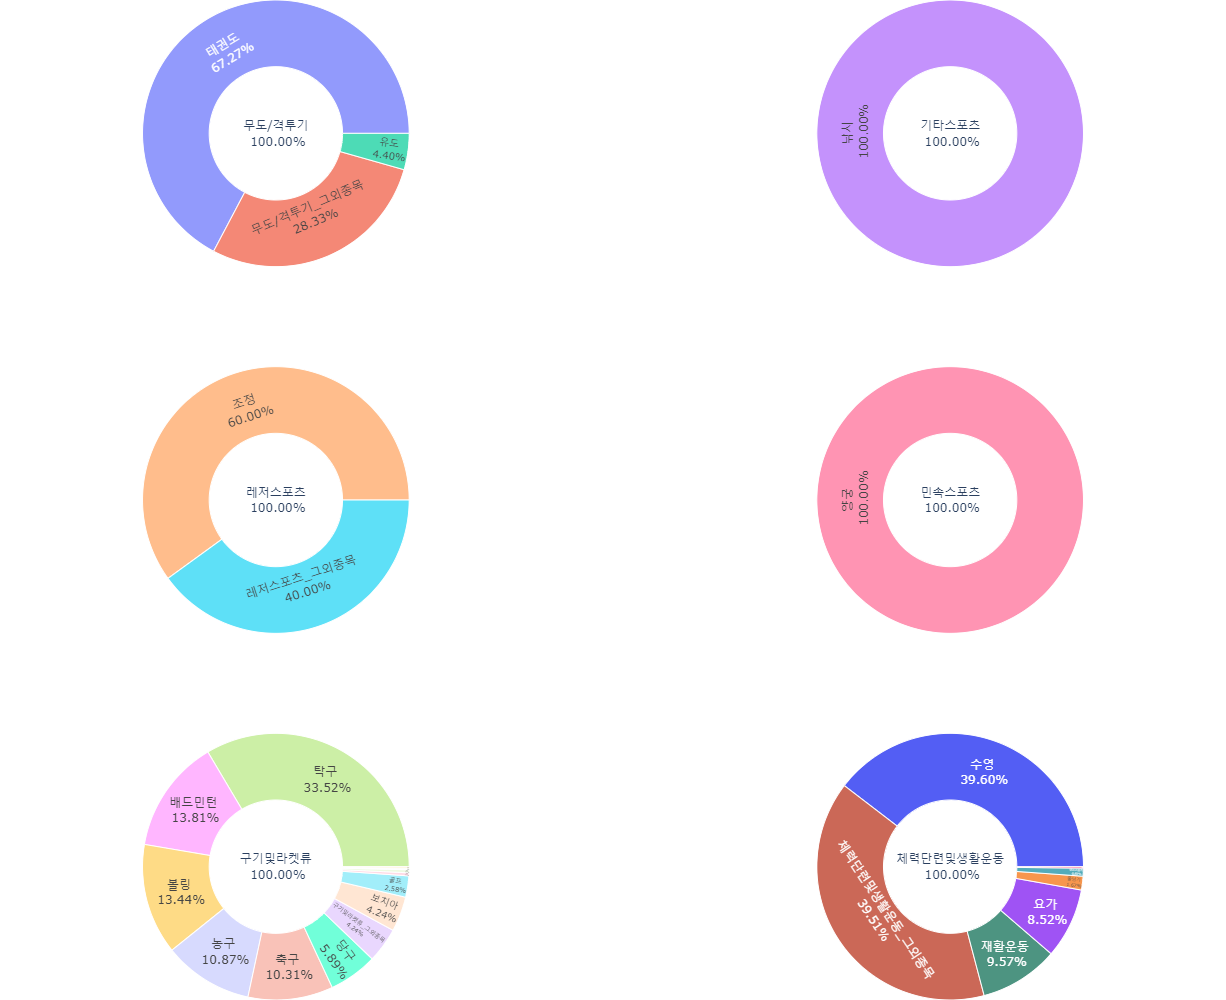

In [195]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
          [{"type": "domain"}, {"type": "domain"}]],
)

fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df1['수요운동종목소분류명'],
    parents=df1['수요운동종목대분류명'],
    hovertext=df1['대분류별 강좌종목비율']*100,
    values=df1['강좌종목수 '],
    text=df1['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=1, col=1)
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df2['수요운동종목소분류명'],
    parents=df2['수요운동종목대분류명'],
    hovertext=df2['대분류별 강좌종목비율']*100,
    values=df2['강좌종목수 '],
    text=df2['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=1, col=2)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df3['수요운동종목소분류명'],
    parents=df3['수요운동종목대분류명'],
    hovertext=df3['대분류별 강좌종목비율']*100,
    values=df3['강좌종목수 '],
    text=df3['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=2, col=1)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df4['수요운동종목소분류명'],
    parents=df4['수요운동종목대분류명'],
    hovertext=df4['대분류별 강좌종목비율']*100,
    values=df4['강좌종목수 '],
    text=df4['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=2, col=2)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df5['수요운동종목소분류명'],
    parents=df5['수요운동종목대분류명'],
    hovertext=df5['대분류별 강좌종목비율']*100,
    values=df5['강좌종목수 '],
    text=df5['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=3, col=1)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df6['수요운동종목소분류명'],
    parents=df6['수요운동종목대분류명'],
    hovertext=df6['대분류별 강좌종목비율']*100,
    values=df6['강좌종목수 '],
    text=df6['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=3, col=2)
fig.update_traces(hovertemplate='%{label}<br> %{hovertext:.2f}%')

fig.update_layout(height=1000, showlegend=False)


fig.show()

In [196]:
plotly.offline.plot(fig,filename='종목별장애인스포츠활성정보(개별파이).html',config={'displayModeBar': True}) #html로 내보내기, bar 조정 불가하게 

'종목별장애인스포츠활성정보(개별파이).html'

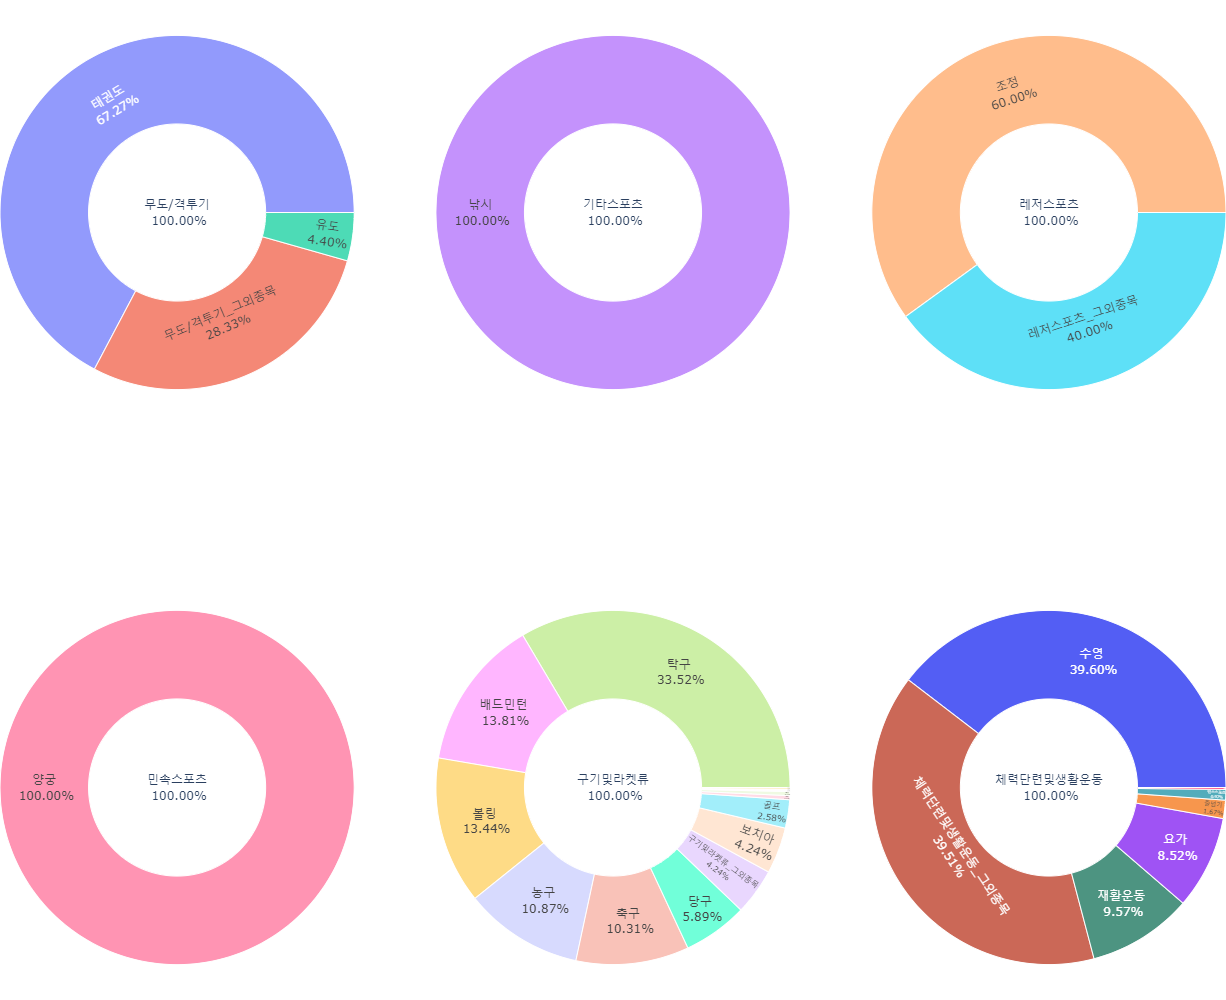

In [197]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}, {"type": "domain"}]],
)

fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df1['수요운동종목소분류명'],
    parents=df1['수요운동종목대분류명'],
    hovertext=df1['대분류별 강좌종목비율']*100,
    values=df1['강좌종목수 '],
    text=df1['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=1, col=1)
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df2['수요운동종목소분류명'],
    parents=df2['수요운동종목대분류명'],
    hovertext=df2['대분류별 강좌종목비율']*100,
    values=df2['강좌종목수 '],
    text=df2['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=1, col=2)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df3['수요운동종목소분류명'],
    parents=df3['수요운동종목대분류명'],
    hovertext=df3['대분류별 강좌종목비율']*100,
    values=df3['강좌종목수 '],
    text=df3['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=1, col=3)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df4['수요운동종목소분류명'],
    parents=df4['수요운동종목대분류명'],
    hovertext=df4['대분류별 강좌종목비율']*100,
    values=df4['강좌종목수 '],
    text=df4['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=2, col=1)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df5['수요운동종목소분류명'],
    parents=df5['수요운동종목대분류명'],
    hovertext=df5['대분류별 강좌종목비율']*100,
    values=df5['강좌종목수 '],
    text=df5['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=2, col=2)
fig.add_trace(go.Sunburst(                                 #강좌종목수가 0이면 안돌아감 
    labels=df6['수요운동종목소분류명'],
    parents=df6['수요운동종목대분류명'],
    hovertext=df6['대분류별 강좌종목비율']*100,
    values=df6['강좌종목수 '],
    text=df6['대분류별 강좌종목비율']*100,texttemplate='%{label}<br> %{text:.2f}%',branchvalues="total",),row=2, col=3)

fig.update_traces(hovertemplate='%{label}<br> %{hovertext:.2f}%')
fig.update_layout(height=1000, showlegend=False)


fig.show()

In [198]:
plotly.offline.plot(fig,filename='종목별장애인스포츠활성정보(개별파이)3x2.html',config={'displayModeBar': True}) #html로 내보내기, bar 조정 불가하게 

'종목별장애인스포츠활성정보(개별파이)3x2.html'

---

### go.sunburst 실습

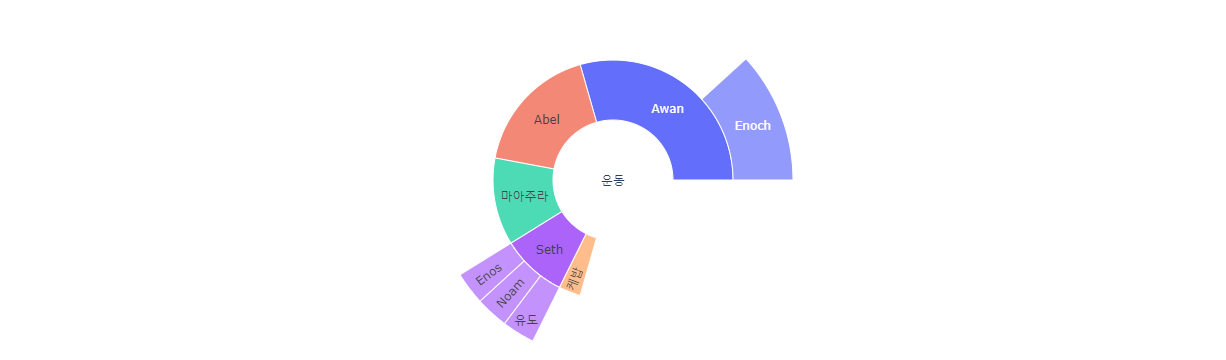

In [160]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["운동", "케밥", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "마아주라","유도"],
    parents=["", "운동", "운동", "Seth", "Seth", "운동", "운동", "Awan", "운동" ,"Seth"],
    values=[10, 1, 0, 1, 1, 6, 6, 4, 4,1],
))
fig.update_traces(mode="markers+lines", hovertemplate='<br>최대: %{hovertext[0]:.2f}'+'<br>평균: %{y:.2f}'+'<br>최소: %{hovertext[1]:.2f}')

fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

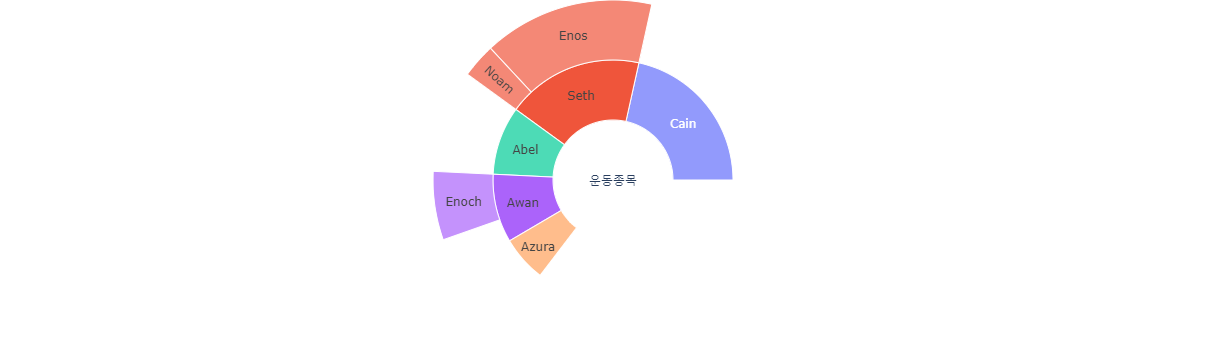

In [180]:
fig =go.Figure(go.Sunburst(
    labels=[ "운동종목", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["",    "운동종목",  "운동종목",  "Seth", "Seth", "운동종목",  "운동종목",  "Awan",  "운동종목" ],
    values=[  65,    14,     12,     10,     2,      6,      6,      4,       4],
    branchvalues="total",
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()